<div class="alert alert-block alert-info">
    <b><h1>ENGR 1330 Computational Thinking with Data Science </h1></b> 
</div> 

Copyright © 2021 Theodore G. Cleveland and Farhang Forghanparast

Last GitHub Commit Date: 
    
# 28: Regression Quality Assessments
- Goodness-of-fit metrics
- Interval estimates of parameters (slope, intercept, ...)
- Interval estimates of predictions

## Terminology from a Marksmanship Analog

:::{admonition} Skip to "Measures of Fitness" for brevity.
:class: tip

One can skip this section, and leave reader to explore details - we are mostly after some of the terminology, but it is not crucial to use the marksman analogy to convey the meanings of the terminology.

Skip to [](content:references:labels) below for brevity

:::

Pretend we are working on a FPS game named "Olympic 10-meter Air Pistol" we are developing as a training tool. [https://en.wikipedia.org/wiki/ISSF_10_meter_air_pistol](https://en.wikipedia.org/wiki/ISSF_10_meter_air_pistol)

First some packages

In [1]:
import random
import numpy
import matplotlib.pyplot

So first we are going to build a function that shows a target, with strikes on the target.

In [2]:
def showmytarget(myx,myy,centerx,centery):
#    import matplotlib.pyplot as plt
    fig, ax = matplotlib.pyplot.subplots(figsize = (10,10)) # note we must use plt.subplots, not plt.subplot
    circle1 = matplotlib.pyplot.Circle((centerx, centery), 1, color='black')
    circle2 = matplotlib.pyplot.Circle((centerx, centery), 1, color='orange', fill=False)
    circle3 = matplotlib.pyplot.Circle((centerx, centery), 0.5, color='orange', fill=False)
    circle4 = matplotlib.pyplot.Circle((centerx, centery), 2, color='black', fill=False)
    circle5 = matplotlib.pyplot.Circle((centerx, centery), 3, color='black', fill=False)
    circle6 = matplotlib.pyplot.Circle((centerx, centery), 4, color='black', fill=False)
    circle7 = matplotlib.pyplot.Circle((centerx, centery), 5, color='black', fill=False)
    circle8 = matplotlib.pyplot.Circle((centerx, centery), 6, color='black', fill=False)
    ax.set_xlim((-10, 10))
    ax.set_ylim((-10, 10))
    ax.plot(myx,myy, 'o', color='r') #vector of hits
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(circle3)
    ax.add_artist(circle4)
    ax.add_artist(circle5)
    ax.add_artist(circle6)
    ax.add_artist(circle7)
    ax.add_artist(circle8)
    matplotlib.pyplot.show();
    return

### Accuracy

The concept of accuracy is a measure of how close to the "true" or population value is our estimate.  
If we are estimating the mean value, then the "bullseye" is the population mean $\mu$, our estimate is $\bar x$.

Consider the graphical simulator below.  The target is centered at (0,0).  We will take 10 shots and evaluate our performance, lets say that we are kind of old and shaky, sometimes we hit the bullseye, sometimes we don't but in 40 years of shooting, on average, we get good scores and tend to hit near the center.

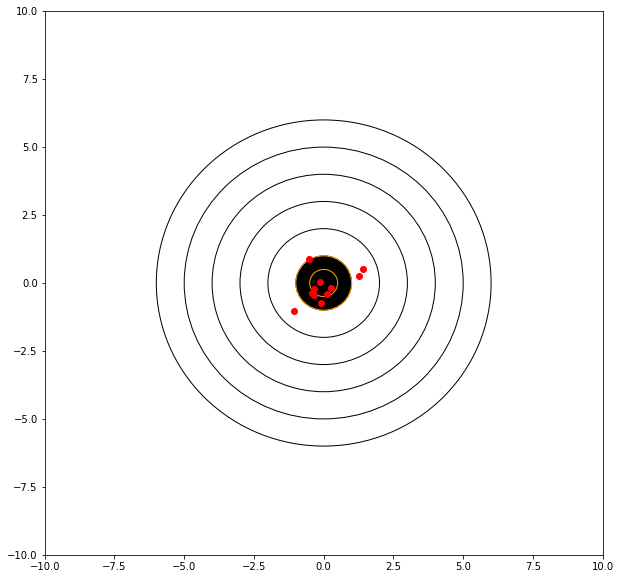

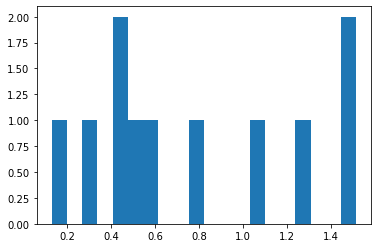

mean distance from bullseye = 0.7693261373800288


In [3]:
mu = 0.0 # where we tend to hit 
sigma = 0.60 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(11): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append((xvalue**2 + yvalue**2)**0.5)
showmytarget(myx,myy,0,0)
matplotlib.pyplot.hist(distxy,bins=20)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))

### Aiming Point

Consider the graphical simulator below. The target is centered at (0,0). We will take 10 shots and evaluate our performance, lets say that we are kind of sloppy and shaky, sometimes we hit the bullseye, sometimes we don't but in 40 years of shooting, on average, we get ok scores -- in this case our mean value deviates from zero, say a bit left and low.

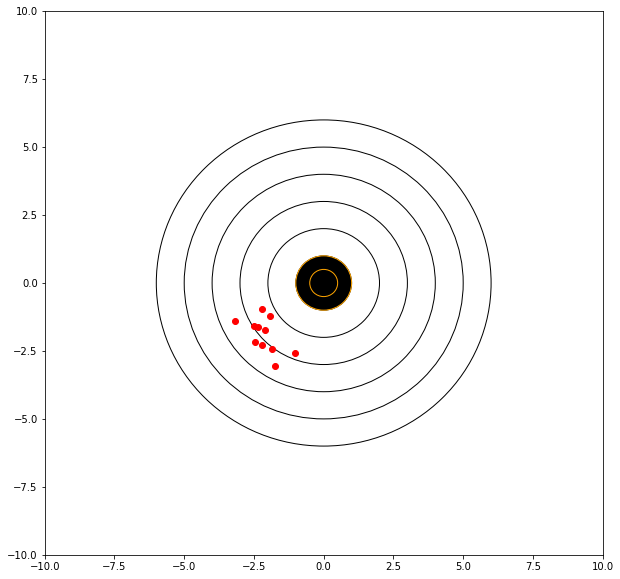

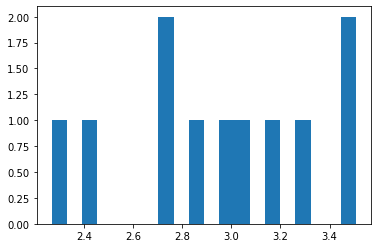

mean distance from bullseye = 2.950576217731643


In [4]:
mu = -2.0 # where we tend to hit 
sigma = 0.6 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(11): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append((xvalue**2 + yvalue**2)**0.5)
showmytarget(myx,myy,0,0)
matplotlib.pyplot.hist(distxy,bins=20)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))

### Precision

The concept of precision is a measure of the repeatability of our estimates.  In this context the dispersion is the metric, i.e. variance.  Consider the graphical simulator below. The target is centered at (0,0). We will take 10 shots and evaluate our performance, lets say that we are kind of sloppy but very steady, all our shots are quite close, and it really depends on how we set up our sights.

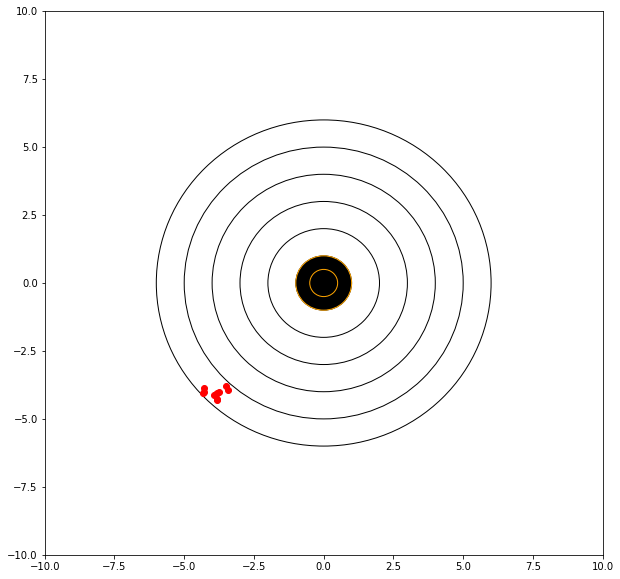

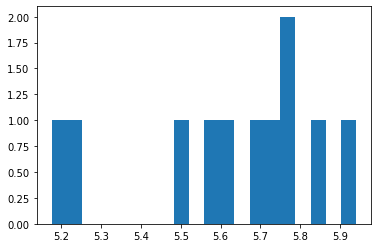

mean distance from bullseye = 5.622266855379564


In [5]:
mu = -4.0 # where we tend to hit 
sigma = 0.3 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(11): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append((xvalue**2 + yvalue**2)**0.5)
showmytarget(myx,myy,0,0)
matplotlib.pyplot.hist(distxy,bins=20)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))

If we can adjust our sights to hit a bit high and right (of the red dots) then we anticipate a better score.


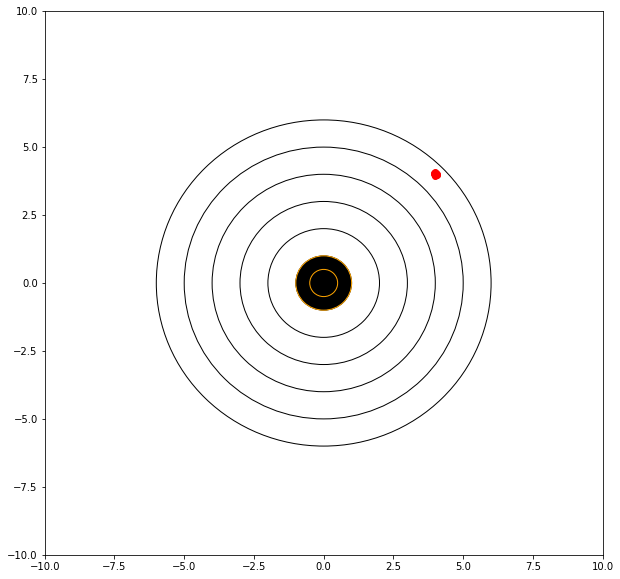

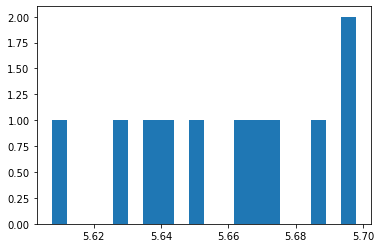

mean distance from bullseye = 5.658740212121018


In [6]:
mu = 4.00 # where we tend to hit 
sigma = 0.03 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(11): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append((xvalue**2 + yvalue**2)**0.5)
showmytarget(myx,myy,0,0)
matplotlib.pyplot.hist(distxy,bins=20)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))

### Bias

Bias is a systematic "error" or offset - similar to the distance from the bullseye in our examples.  If we have a precise rifle that shoots a known distance from the bullseye, thats still a useful tool - we either adjust our aiming point, or the device to account for this bias.  Its akin to the last example where we demonstrate the contribution to error from a poor point of aim, and an unsteady hand.

### Residuals

In the context of our target shooting, the residual is the distance from the target that our model (the rifle) places the estimate (shot).  Lets examine the simulations over again.  First with a bias and unsteady hands

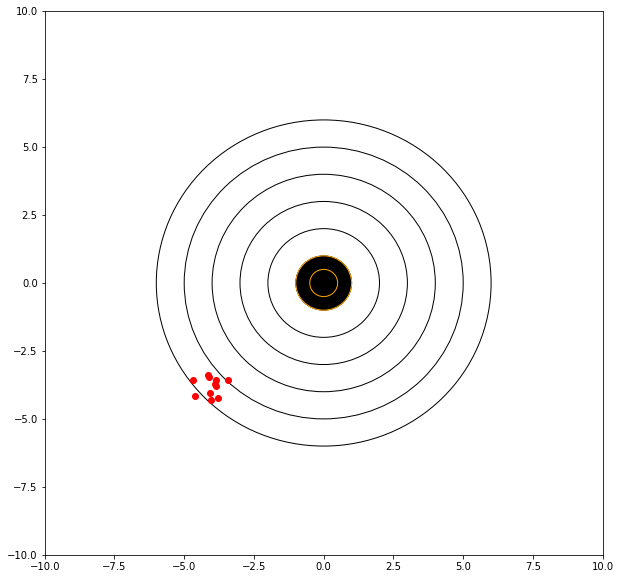

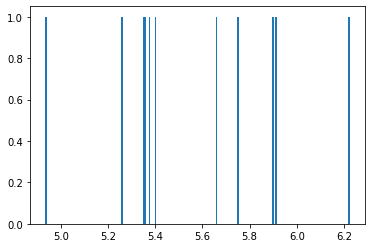

mean distance from bullseye = 5.5556474408402625


In [7]:
mu = -4.0 # where we tend to hit 
sigma = 0.3 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(11): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append((xvalue**2 + yvalue**2)**0.5)
showmytarget(myx,myy,0,0)
matplotlib.pyplot.hist(distxy,bins=200)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))

In these examples we know the target should be at (0,0) so lets stipulate that to our model (rifle).

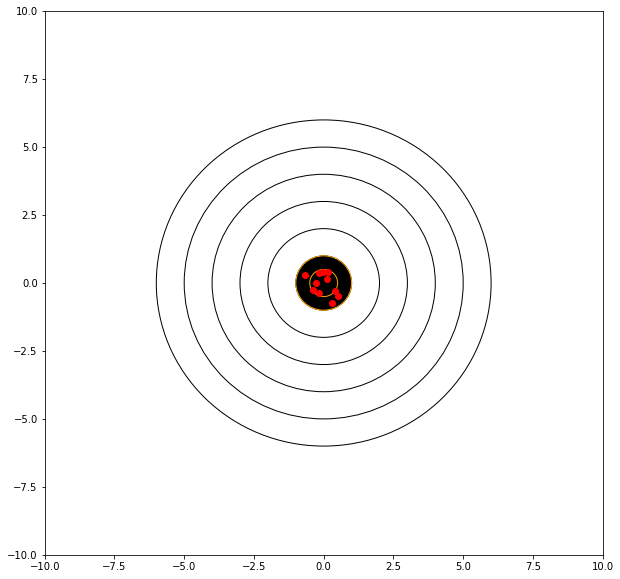

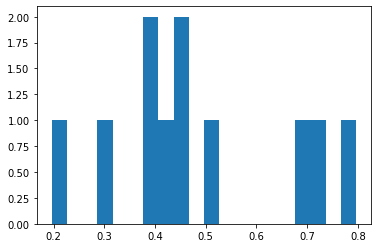

mean distance from bullseye = 0.4840945906743531
mean dispersion from point of aim = 0.1776987334178709


In [8]:
mu = 0.0 # where we tend to hit 
sigma = 0.3 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(11): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append((xvalue**2 + yvalue**2)**0.5)
showmytarget(myx,myy,0,0)
matplotlib.pyplot.hist(distxy,bins=20)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))
print('mean dispersion from point of aim =',numpy.std(distxy))

So even with a perfect aim because of shaky hands, our average distance from the target is 0.37, and dispersion from the point of aim is 0.196.

Now lets improve our situatuon by putting our device into a mechanical mount that reduces the shake.

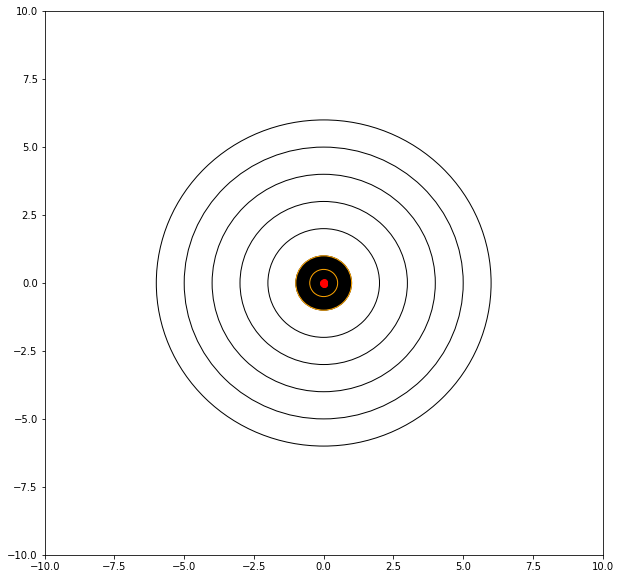

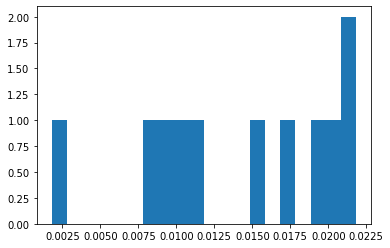

mean distance from bullseye = 0.014198012721991182
mean dispersion from point of aim = 0.006223956676911045


In [9]:
mu = 0.0 # where we tend to hit 
sigma = 0.01 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(11): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append((xvalue**2 + yvalue**2)**0.5)
showmytarget(myx,myy,0,0)
matplotlib.pyplot.hist(distxy,bins=20)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))
print('mean dispersion from point of aim =',numpy.std(distxy))

Now with perfect aim and a rigid mount, our average distance from the target is 0.01, and the dispersion is 0.006.

A technique you will learn in your statistics class called analysis of variance is a practical application of these ideas.  The distances (in this case always positive) are the residuals, and the variance has two contributing components; how far from the true value the estimator is (our bullseye distance); and how spread out around the point of aim the estimates are (sample variance).

What adds to the challenge is what happens when the target moves!

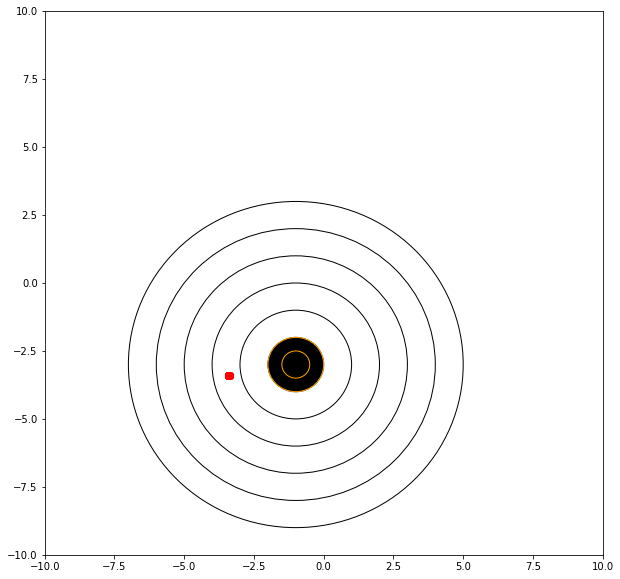

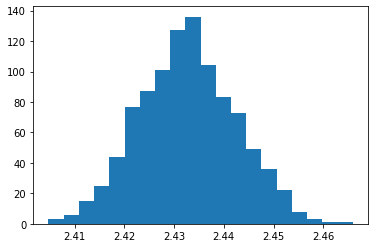

mean distance from bullseye = 2.4327218724493984
mean dispersion from point of aim = 0.009695516566440349


In [10]:
mu = -3.40 # where we tend to hit 
sigma = 0.01 # how steady we are when the shot trips
myx = []; myy = []; distxy = []
for i in range(1001): # 10 shots
    xvalue = random.gauss(mu, sigma)
    yvalue = random.gauss(mu, sigma)
    myx.append(xvalue)
    myy.append(yvalue)
    distxy.append(((xvalue+1)**2 + (yvalue+3)**2)**0.5)
showmytarget(myx,myy,-1,-3)
matplotlib.pyplot.hist(distxy,bins=20)
matplotlib.pyplot.show()
print('mean distance from bullseye =',numpy.mean(distxy))
print('mean dispersion from point of aim =',numpy.std(distxy))

:::{admonition} Summary
The main points of the marksmanship analog are ideas of:
1. Accuracy  (how close to the center of target)
2. Precision  (how repeatable)
3. Bias (a systematic measure of inaccuracy, how far from the true mean) a biased result is useful! provides guidance to improve accuracy.
4. Residuals (similar to bias, but we are interested in their variance) provides guidance to improve precision.
:::

## Linear Regression <br>
Recall for Linear Regression:
- A predictive analytics technique that uses historical (either a temporal sense, or just actual observation is implied) data to predict an output variable.
- Employed to explore the relationship between predictor and output variables and predict the output variable based on known values of predictors.  <br>    
- *How does linear regression work?* By effing magic!, but really To estimate Y using linear regression, we stipulate the model equation:  $Y_e=\beta X + \alpha$; then find statistically significant values of the parameters $\alpha$ and $\beta$ that minimise the difference between $Y_{obs}$ and $Y_e$. If we are able to determine the optimum values of these two parameters, then we will have the line of best fit that we can use to predict the values of $Y$, given the value of $X$. <br>
- *How to estimate the coefficients?* We used a method called "Ordinary Least Squares (OLS)" and minimized the error term (using calculus) as $\epsilon=Y_{obs} - (\beta X + \alpha)$ and found that the unknown values for $\alpha$ and $\beta$ were related to the covariance of X and Y and the variance of X.  We constructed nomral equations, and developed a systematic method to estimate the parameters $\alpha$ and $\beta$. *For grins, we did this using primative python and linear algebra, and again using external packages*

Now remember when we discussed Probability Density Function (PDF) for the normal distribution? - Probably not!

![](https://miro.medium.com/max/572/1*P78bMZPhhKnzLkwcNgeJ0g.png) <br>

This equation is telling us the probability density of our sample x from our random variable generator X, when the true parameters of the distribution are μ and σ. If the density is kind of large (these are always small numbers, less than one) we would infer that the value is common, frequent, likely ...<br>


Let’s say our value is 3, what is the probability it comes from a distribution of μ = 3 and σ = 1? What if it came from a distribution with μ = 7 and σ = 2? Which one is more probable?<br>

In [11]:
import numpy as np
import pandas as pd
import statistics
import scipy.stats
from matplotlib import pyplot as plt

In [12]:
scipy.stats.norm.pdf(3, 3, 1)

0.3989422804014327

In [13]:
scipy.stats.norm.pdf(3, 7, 2)

0.02699548325659403

So it is much more likely it came from the first distribution. The PDF equation has shown us how likely those values are to appear in a distribution with certain parameters. Keep that in mind for later. But what if we had a bunch of points we wanted to estimate?

Let’s assume we get a bunch of samples from our process generator X which we know to come from some normal distribution, and all are mutually independent from each other. If this is the case, the total probability of observing all of the data is the product of obtaining each data point individually. 


What is the probability of 2 and 6 being drawn from a distribution with μ = 4 and σ = 1<br>

In [14]:
scipy.stats.norm.pdf(2, 4, 1) * scipy.stats.norm.pdf(6, 4, 1)

0.0029150244650281948

## Maximum Likelihood Estimation (MLE) 
A method  used to specify a distribution of unknown parameters, then using your data to pull out the actual parameter values.
Let's look at our linear model:

![](https://miro.medium.com/max/352/1*iJrwssQh4dJARzeuQPw1kw.png) <br>

The noise parameter (error) is basically why the points (samples) do not fall exactly on the line. 
The error for each point would be the distance from the point to our line. 
We’d like to explicitly include those errors in our model. 
One method of doing this, is to **assume** the errors are distributed from a Gaussian (Normal) distribution with a mean of 0 and some unknown variance σ². The Gaussian seems like a good choice, because our errors look like they’re symmetric about were the line would be, and that small errors are more likely than large errors. <br>

This model actually has *three* parameters: the slope and intercept of our line and the variance of the noise distribution. 
Our main goal is to find the best parameters for the slope and intercept of our line.

let’s rewrite our model from above as a single conditional distribution given x:

![](https://miro.medium.com/max/403/1*S9Wo7Ay3O-CGarsNULSWOA.png) <br>

This is equivalent to pushing our x through the equation of the line and then adding noise from the 0 mean Gaussian. Now, we can write the conditional distribution of y given x in terms of this Gaussian. This is just the equation of a Gaussian distribution’s probability density function, with our linear equation in place of the mean:

![](https://miro.medium.com/max/576/1*3M7mJamXgcFPXzvD0U4yIA.png) <br>

The semicolon in the conditional distribution is just like a comma, but it’s a useful notation for separating our observed data from the parameters. <br>

Each point is independent and identically distributed (iid), so we can write the likelihood function with respect to all of our observed points as the product of each individual probability density. Since σ² is the same for each data point, we can factor out the term of the Gaussian which doesn’t include x or y from the product:

![](https://miro.medium.com/max/576/1*JXtvd6fO6ydgAqQR4jAaWQ.png) <br>

The next step in MLE, is to find the parameters which maximize this function. To make our equation simpler, let’s take the log of our likelihood. Recall, that maximizing the log-likelihood is the same as maximizing the likelihood since the log is monotonic. The natural log cancels out with the exponential, turns products into sums of logs, and division into subtraction of logs; so our log-likelihood looks much simpler:

![](https://miro.medium.com/max/576/1*gDNxsKgiWTj6AWmolmkjlQ.png) <br>

To clean things up a bit more, let’s write the output of our line as a single value:

![](https://miro.medium.com/max/226/1*tCAZf5pWI5UYyWLXiZ-tSw.png) <br>

Now our log-likelihood can be written as:

![](https://miro.medium.com/max/576/1*U8yya-GV548dLYdRVabERQ.png) <br>

To remove the negative signs, let’s recall that maximizing a number is the same thing as minimizing the negative of the number. So instead of maximizing the likelihood, let’s minimize the negative log-likelihood:

![](https://miro.medium.com/max/576/1*Y_B6FPJq0jb17qK04MVltw.png) <br>

Our ultimate goal is to find the parameters of our line. To minimize the negative log-likelihood with respect to the linear parameters (the θs), we can imagine that our variance term is a fixed constant. Removing any constant’s which don’t include our θs won’t alter the solution. Therefore, we can throw out any constant terms and elegantly write what we’re trying to minimize as:

![](https://miro.medium.com/max/175/1*O8b2CNiqn3xjUF3fkklrXQ.png) <br>

The maximum likelihood estimate for our linear model is the line which minimizes the sum of squared errors!

![](https://media1.giphy.com/media/SJX3gbZ2dbaEhU92Pu/source.gif) <br>

Now, let's solve for parameters. We’ve concluded that the maximum likelihood estimates for our slope and intercept can be found by minimizing the sum of squared errors. Let’s expand out our minimization objective and use i as our index over our n data points:

![](https://miro.medium.com/max/403/1*0zO8-m3ZdruX0hgJ4zLm9g.png) <br>

The square in the SSE formula makes it quadratic with a single minimum. The minimum can be found by taking the derivative with respect to each of the parameters, setting it equal to 0, and solving for the parameters in turn. <br>

Taking the partial derivative with respect to the intercept, Setting the derivative equal to 0 and solving for the intercept gives us:

![](https://miro.medium.com/max/227/1*YzIf9e2kTWbjgx58wb-KXw.png) <br>

Taking the partial derivative with respect to the slope, Setting the derivative equal to 0 and solving for the slope gives us:

![](https://miro.medium.com/max/324/1*o0vOZ25b1h57UyidKsJlvQ.png) <br>

**And now it's time to put it all together:**  The code block below produces MLE estimation of the linear data model slope and intercept, given the lists for x and y.


In [15]:
def find_line(xs, ys):
    """Calculates the slope and intercept, using normal equations"""
    
    # number of points
    n = len(xs)
    # calculate means
    x_bar = sum(xs)/n
    y_bar = sum(ys)/n
        
    # calculate slope
    num = 0
    denom = 0
    for i in range(n):
        num += (xs[i]-x_bar)*(ys[i]-y_bar)
        denom += (xs[i]-x_bar)**2
    slope = num/denom
    
    # calculate intercept
    intercept = y_bar - slope*x_bar
    
    return slope, intercept

(content:references:labels)=
## Measures of "Fitness" 
Recall our missle telemetry example <br>

We had a table of recorded times and speeds from some experimental observations. Use MLE to find the intercept and the slope:

|Elapsed Time (s)|Speed (m/s)|
|---:|---:|
|0 |0|
|1.0 |3|
|2.0 |7|
|3.0 |12|
|4.0 |20|
|5.0 |30|
|6.0 | 45.6| 
|7.0 | 60.3 |
|8.0 | 77.7 |
|9.0 | 97.3 |
|10.0| 121.1|

In [16]:
def find_line(xs, ys):
    """Calculates the slope and intercept, using normal equations"""
    
    # number of points
    n = len(xs)
    # calculate means
    x_bar = sum(xs)/n
    y_bar = sum(ys)/n
        
    # calculate slope
    num = 0
    denom = 0
    for i in range(n):
        num += (xs[i]-x_bar)*(ys[i]-y_bar)
        denom += (xs[i]-x_bar)**2
    slope = num/denom
    
    # calculate intercept
    intercept = y_bar - slope*x_bar
    
    return slope, intercept

In [17]:
time = [0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
speed = [0, 3, 7, 12, 20, 30, 45.6, 60.3, 77.7, 97.3, 121.2]
find_line(time, speed) #Is this similar to our past results?! 

(11.977272727272727, -16.78636363636364)

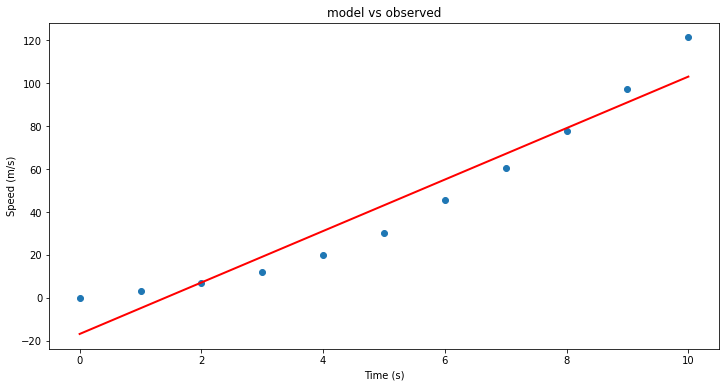

In [18]:
# Predict values
X = np.array(time)
alpha = -16.78636363636364
beta = 11.977272727272727
ypred = alpha + beta * X


# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, speed, 'o')           # scatter plot showing actual data
plt.plot(X, ypred, 'r', linewidth=2)   # regression line
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.title('model vs observed')

plt.show()

Remember, we already saw how to add predictors, but here lets explore a couple of measures of "fitness"

## Goodness-of-Fit 

So far, we have mostly assessed the quality of fits visually. We can make numerical assessments as well via Goodness-of-Fit (GOF) measures. Let's discuss three of the most common metrics for evaluating predictions on regression machine learning problems: <br>

### Mean Absolute Error (MAE): <br>
The Mean Absolute Error (or MAE) is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were. The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting). Here is the formula:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/3ef87b78a9af65e308cf4aa9acf6f203efbdeded) <br>

It is thus an arithmetic average of the absolute errors $|e_i|=|y_i-x_i|$, where $y_i$ is the prediction and $x_i$ the true value.  This is known as a scale-dependent accuracy measure and therefore cannot be used to make comparisons between series using different scales.

In [19]:
# calculate manually
d = speed - ypred
mae_m = np.mean(abs(d))


print("Results by manual calculation:")
print("MAE:",mae_m)



import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(speed, ypred)
print("SKLEARN results MAE: ",mae)

Results by manual calculation:
MAE: 8.927272727272728
SKLEARN results MAE:  8.927272727272728


### Mean Squared Error (MSE) and Root Mean Squared Error (RMSE): <br>

The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error. It measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. The MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better. Here is the formula:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e) <br>

An MSE of zero, meaning that the estimator predicts observations of the parameter with perfect accuracy, is ideal (but typically not possible).Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. 
This is called the Root Mean Squared Error (or RMSE). RMSE is the most widely used metric for regression tasks

In [20]:
mse_m = np.mean(d**2)
rmse_m = np.sqrt(mse_m)
print("MSE:", mse_m)
print("RMSE:", rmse_m)
mse = metrics.mean_squared_error(speed, ypred)
rmse = np.sqrt(mse) # or mse**(0.5) 
print("SKLEARN results MSE: ",mse)
print("SKLEARN results RMSE: ",rmse)

MSE: 108.88210743801659
RMSE: 10.434658951686758
SKLEARN results MSE:  108.88210743801659
SKLEARN results RMSE:  10.434658951686758


### R^2 Metric: <br>

The R^2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination. This is a value between 0 and 1 for no-fit and perfect fit respectively. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model..Here is the formula:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/3a1f55d7e84c24299917fb3fec4d0439b81e728d) <br>
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2669c9340581d55b274d3b8ea67a7deb2225510b) <br>
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/c7e3ab84636f38c257641f85f009bcb422c73151) <br>

In [21]:
r2_m = 1-(sum(d**2)/sum((speed-np.mean(speed))**2))
print("R-Squared:", r2_m)
r2 = metrics.r2_score(speed, ypred)
print("SKLEARN results R-Squared: ",r2)

R-Squared: 0.9294545816516323
SKLEARN results R-Squared:  0.9294545816516323



### How confident are we with a prediction?

By definition, the prediction of a linear regression model is an estimate or an approximation and contains some uncertainty. 
The uncertainty comes from the errors in the model itself and noise in the input data. 
The model is an approximation of the relationship between the input variables and the output variables. 
The model error can be decomposed into three sources of error: the variance of the model, the bias of the model, and the variance of the irreducible error (the noise) in the data.

 $Error(Model) = Variance(Model) + Bias(Model) + Variance(Irreducible Error)$
    
#### Marksmanship Example

Before going any further, let's assume that you were arrested by the king's guard as you were minding your business in the streets of King's Landing for the crime of planning for the murder of King Joffrey Baratheon. As much as you hate King Joffrey you had no plans for killing him but no one believes you. In the absence of witnesses or a confession, you demand trial by combat.  But they inform you that the Germanic law to settle accusations is no longer used and it has been replaced with a new method. You get to choose a bowman. That bowman will make 3 shots for you. And if he hits the bullseye you will walk a free man. Otherwise, you will be hanged.  
    
You have two options. The first bowman is Horace. He is known as one of the greatest target archers of all time. He is old though and due to lack of an efficient social security system in Westeros, he has to work as a hired bowman for the high court to earn a living. You ask around and you hear that he still can shoot a bullseye but as his hands shake, he sometimes misses by a lot. The second archer is Daryl. He is also a wellkown archer but unfortunately he has a drinking problem. You have understood that there has been cases that he has shot the bullseye in all of his three shots and there has been cases that he has completely missed the bullseye. The thing about him is that his three shots are always very close together. Now, you get to pick. Between Horace and Daryl, who would you choose to shoot for your freedom?   

- __Bias, Variance, and the bowman dilemma!__
    We used the example above to give you an initial understanding of bias and variance and their impact on a model's performance. Given this is a complicated and yet important aspect of data modeling and machine learning, without getting into too much detail, we will discuss these concepts. Bias reflects how close the functional form of the model can get to the true relationship between the predictors and the outcome. Variance refers to the amount by which [the model] would change if we estimated it using a different training data set.  ![](https://miro.medium.com/max/1670/1*On4Uk9Favg50ylBOak-ECQ@2x.png) Looking at the picture above, Horace was an archer with high variance and low bias, while Daryl had high bias and low variability. In an ideal world, we want low bias and low variance which we cannot have. When there is a high bias error, it results in a very simplistic model that does not consider the variations very well. Since it does not learn the training data very well, it is called Underfitting. When the model has a high variance, it will still consider the noise as something to learn from. That is, the model learns the noise from the training data, hence when confronted with new (testing) data, it is unable to predict accurately based on it. Since in the case of high variance, the model learns too much from the training data, it is called overfitting. To summarise:
    - A model with a high bias error underfits data and makes very simplistic assumptions on it
    - A model with a high variance error overfits the data and learns too much from it
    - A good model is where both Bias and Variance errors are balanced. The balance between the Bias error and the Variance error is the Bias-Variance Tradeoff.
    
    The irreducible error is the error that we can not remove with our model, or with any model. The error is caused by elements outside our control, such as statistical noise in the observations. A model with low bias and high variance predicts points that are around the center generally, but pretty far away from each other (Horace). A model with high bias and low variance is pretty far away from the bull’s eye, but since the variance is low, the predicted points are closer to each other (Daryl). Bias and Variance play an important role in deciding which predictive model to use: Something that you will definitly learn more about if you go further in the field of machine learning and predicitve models.

- __How can we measure bias and variance?__
    
    There are GOF metrics that can measure the bias and variance of a model: For example the Nash–Sutcliffe model efficiency coefficient and the Kling-Gupta Efficiency (KGE). The Nash–Sutcliffe efficiency is calculated as one minus the ratio of the error variance of the modeled time-series divided by the variance of the observed time-series. In the situation of a perfect model with an estimation error variance equal to zero, the resulting Nash-Sutcliffe Efficiency equals 1 (NSE = 1). KGE provides a diagnostically interesting decomposition of the Nash-Sutcliffe efficiency (and hence MSE), which facilitates the analysis of the relative importance of its different components (correlation, bias and variability).   

- __How confident are we with our linear regression model?__

    The 95% confidence interval for the forecasted values ŷ of x is
    
    ![](https://i0.wp.com/www.real-statistics.com/wp-content/uploads/2012/12/confidence-interval-regression.png?resize=92%2C20&ssl=1) 
    
    where 
    
    ![](https://i2.wp.com/www.real-statistics.com/wp-content/uploads/2013/02/image1773.png?w=154&ssl=1)   
    
    This means that there is a 95% probability that the true linear regression line of the population will lie within the confidence interval of the regression line calculated from the sample data.
    
    ![](https://i1.wp.com/www.real-statistics.com/wp-content/uploads/2012/12/confidence-prediction-interval.png?w=860&ssl=1)
    
    In the graph on the left of Figure 1, a linear regression line is calculated to fit the sample data points. The confidence interval consists of the space between the two curves (dotted lines). Thus there is a 95% probability that the true best-fit line for the population lies within the confidence interval (e.g. any of the lines in the figure on the right above).
    
    There is also a concept called a prediction interval. Here we look at any specific value of x, x0, and find an interval around the predicted value ŷ0 for x0 such that there is a 95% probability that the real value of y (in the population) corresponding to x0 is within this interval (see the graph on the right side). The 95% prediction interval of the forecasted value ŷ0 for x0 is 
    
    ![](https://i1.wp.com/www.real-statistics.com/wp-content/uploads/2012/12/prediction-interval-regression.png?resize=98%2C20&ssl=1)
    
    where the standard error of the prediction is
    
    ![](https://i0.wp.com/www.real-statistics.com/wp-content/uploads/2012/12/standard-error-prediction.png?resize=186%2C55&ssl=1)
    
    For any specific value x0 the prediction interval is more meaningful than the confidence interval.
    
    ![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/04/Relationship-between-prediction-actual-value-and-prediction-interval.png)
    
 <br>

### Example (Continued)  <br>

|Elapsed Time (s)|Speed (m/s)|
|---:|---:|
|0 |0|
|1.0 |3|
|2.0 |7|
|3.0 |12|
|4.0 |20|
|5.0 |30|
|6.0 | 45.6| 
|7.0 | 60.3 |
|8.0 | 77.7 |
|9.0 | 97.3 |
|10.0| 121.1|

This time we want to explore the confidence and prediciton intervals for our linear regression model: 


In [22]:
#time = [0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] # activate if you clobbered the data above
#speed = [0, 3, 7, 12, 20, 30, 45.6, 60.3, 77.7, 97.3, 121.2]
x = np.array(time)
Y = np.array(speed)

#We already know these parameters from last week but let's assume that we don't!
# alpha = -16.78636363636364
# beta = 11.977272727272727
#Our linear model: ypred = alpha + beta * x
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm     #needed for linear regression
from statsmodels.sandbox.regression.predstd import wls_prediction_std   #needed to get prediction interval
X = sm.add_constant(x)
re = sm.OLS(Y, X).fit()
print(re.summary())
print(re.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     118.6
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           1.75e-06
Time:                        11:55:39   Log-Likelihood:                -41.405
No. Observations:                  11   AIC:                             86.81
Df Residuals:                       9   BIC:                             87.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.7864      6.507     -2.580      0.0

In [23]:
prstd, iv_l, iv_u = wls_prediction_std(re) #iv_l and iv_u give you the limits of the prediction interval for each point.
#print(iv_l)
#print(iv_u)

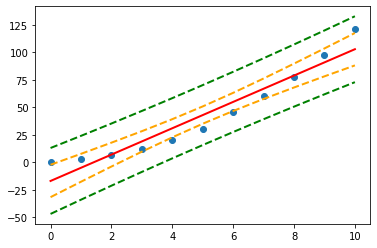

In [24]:
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(re, alpha=0.05)

fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T


plt.plot(x, Y, 'o')
plt.plot(x, fittedvalues, '-',color='red', lw=2)
plt.plot(x, predict_ci_low, '--', color='green',lw=2) #Lower prediction band
plt.plot(x, predict_ci_upp, '--', color='green',lw=2) #Upper prediction band
plt.plot(x, predict_mean_ci_low,'--', color='orange',  lw=2) #Lower confidence band
plt.plot(x, predict_mean_ci_upp,'--', color='orange', lw=2) #Upper confidence band
plt.show()

### Example 
Let's have a look at our old good example of TV, Radio, and Newspaper advertisements and number of sales for a specific product.! <br>

Let's say that we are interested to compare the performance of the linear models that use TV spendings and Radio spendings as their predictor variables in terms of accuracy, bias, and variability. 

In [25]:
import requests
remote_url="http://54.243.252.9/engr-1330-webroot/4-Databases/Advertising.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('Advertising.csv','wb').write(rget.content); # extract from the remote the contents, assign to a local file same name

In [26]:
import numpy as np
import pandas as pd
import statistics
import scipy.stats
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as metrics

# Import and display first rows of the advertising dataset
df = pd.read_csv('Advertising.csv')
tv = np.array(df['TV'])
radio = np.array(df['Radio'])
newspaper = np.array(df['Newspaper'])
sales = np.array(df['Sales'])
# Initialise and fit linear regression model using `statsmodels`
# TV Spending as predictor
model_tv = smf.ols('Sales ~ TV', data=df)
model_tv = model_tv.fit()
TV_pred = model_tv.predict()
# Radio Spending as predictor
model_rd = smf.ols('Sales ~ Radio', data=df)
model_rd = model_rd.fit()
RD_pred = model_rd.predict()

In [27]:
print("RMSE for TV ad spendings as predictor is ",np.sqrt(metrics.mean_squared_error(sales, TV_pred)))
print("RMSE for Radio ad spendings as predictor is ",np.sqrt(metrics.mean_squared_error(sales, RD_pred)))

RMSE for TV ad spendings as predictor is  3.2423221486546887
RMSE for Radio ad spendings as predictor is  4.2535159274564185


In [28]:
print("R2 for TV ad spendings as predictor is ",metrics.r2_score(sales, TV_pred))
print("R2 for Radio ad spendings as predictor is ",metrics.r2_score(sales, RD_pred))

R2 for TV ad spendings as predictor is  0.611875050850071
R2 for Radio ad spendings as predictor is  0.33203245544529536


In [29]:
from scipy.stats import pearsonr 
tv_r = pearsonr(TV_pred, sales)
rd_r = pearsonr(RD_pred, sales)

print("Pearson's r for TV ad spendings as predictor is ",tv_r[0])
print("Pearson's for Radio ad spendings as predictor is ",rd_r[0])

Pearson's r for TV ad spendings as predictor is  0.7822244248616064
Pearson's for Radio ad spendings as predictor is  0.5762225745710551


In [30]:
from hydroeval import *          #Notice this importing method
tv_nse = evaluator(nse, TV_pred, sales)
rd_nse = evaluator(nse, RD_pred, sales)

print("NSE for TV ad spendings as predictor is ",tv_nse)
print("NSE for Radio ad spendings as predictor is ",rd_nse)

NSE for TV ad spendings as predictor is  [0.61187505]
NSE for Radio ad spendings as predictor is  [0.33203246]


In [31]:
tv_kge = evaluator(kgeprime, TV_pred, sales)
rd_kge = evaluator(kgeprime, RD_pred, sales)

print("KGE for TV ad spendings as predictor is ",tv_kge)
print("KGE for Radio ad spendings as predictor is ",rd_kge)
#KGE: Kling-Gupta efficiencies range from -Inf to 1. Essentially, the closer to 1, the more accurate the model is.
#r: the Pearson product-moment correlation coefficient. Ideal value is r=1
#Gamma: the ratio between the coefficient of variation (CV) of the simulated values to 
       #the coefficient of variation of the observed ones. Ideal value is Gamma=1
#Beta: the ratio between the mean of the simulated values and the mean of the observed ones. Ideal value is Beta=1

KGE for TV ad spendings as predictor is  [[0.69201883]
 [0.78222442]
 [0.78222442]
 [1.        ]]
KGE for Radio ad spendings as predictor is  [[0.40068822]
 [0.57622257]
 [0.57622257]
 [1.        ]]


These measures are useful, but plotting is even more so - here we will plot our observations, data model and uncertainty intervals

In [32]:
# Plot regression against actual data - What do we see?
#plt.figure(figsize=(12, 6))
#plt.plot(df['TV'], df['Sales'], 'o')           # scatter plot showing actual data
#plt.plot(df['TV'], TV_pred, 'r', linewidth=2)   # regression line
#plt.xlabel('TV advertising spending')
#plt.ylabel('Sales')
#plt.title('Predicting with TV spendings only')

#plt.show()

#plt.figure(figsize=(12, 6))
#plt.plot(df['Radio'], df['Sales'], 'o')           # scatter plot showing actual data
#plt.plot(df['Radio'], RD_pred, 'r', linewidth=2)   # regression line
#plt.xlabel('TV advertising spending')
#plt.ylabel('Sales')
#plt.title('Predicting with Radio spendings only')

#plt.show()

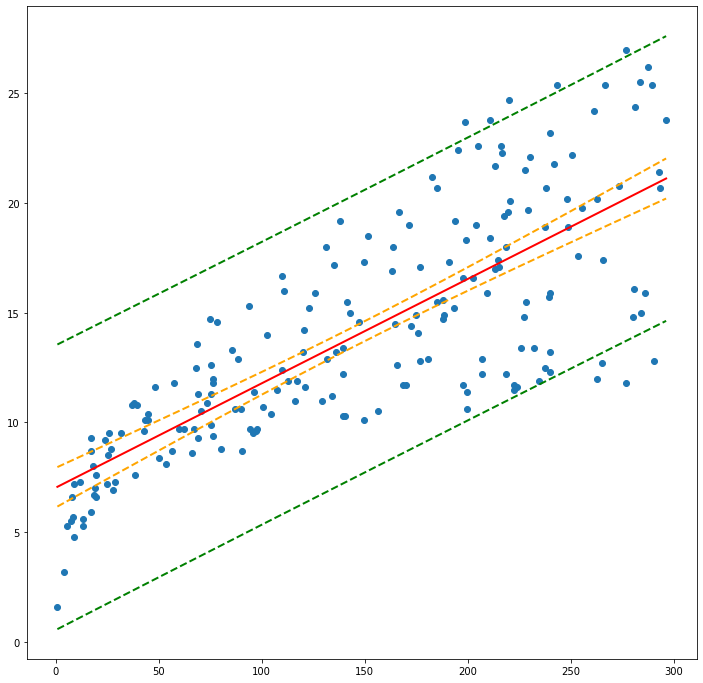

In [33]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std   #needed to get prediction interval
prstd, iv_l, iv_u = wls_prediction_std(model_tv) #iv_l and iv_u give you the limits of the prediction interval for each point.
#print(iv_l)
#print(iv_u)
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(model_tv, alpha=0.05)

fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

df['FittedSales']=fittedvalues
df['PD-Low']=predict_ci_low
df['PD-Upp']=predict_ci_upp
df['CI-Low']=predict_mean_ci_low
df['CI-Upp']=predict_mean_ci_upp
ddf = df.sort_values('TV')

plt.figure(figsize=(12, 12))
plt.plot(ddf['TV'], ddf['Sales'], 'o') # observation scatterplot
plt.plot(ddf['TV'], ddf['FittedSales'], 'r', linewidth=2)   # regression line
plt.plot(ddf['TV'], ddf['CI-Low'],'--', color='orange',lw=2) #Lower prediction band
plt.plot(ddf['TV'], ddf['CI-Upp'],'--',  color='orange',lw=2) #Upper prediction band
plt.plot(ddf['TV'], ddf['PD-Low'],'--', color='green',  lw=2) #Lower confidence band
plt.plot(ddf['TV'], ddf['PD-Upp'], '--',color='green', lw=2) #Upper confidence band
plt.show()



In [34]:
#ddf = df.sort_values('TV')
#print(ddf[['TV','Sales','FittedSales','PD-Low','PD-Upp']])
#print(fittedvalues)

## References
- __"What is Maximum Likelihood Estimation — Examples in Python"__ by __Robert R.F. DeFilippi__ available at* https://medium.com/@rrfd/what-is-maximum-likelihood-estimation-examples-in-python-791153818030 <br>
- __"Linear Regression"__ by __William Fleshman__  available at* https://towardsdatascience.com/linear-regression-91eeae7d6a2e <br>
- __"Regression Accuracy Check in Python (MAE, MSE, RMSE, R-Squared)"__ available at* https://www.datatechnotes.com/2019/10/accuracy-check-in-python-mae-mse-rmse-r.html <br>

- __"A Gentle Introduction to Linear Regression With Maximum Likelihood Estimation"__ by __Jason Brownlee__ available at* https://machinelearningmastery.com/linear-regression-with-maximum-likelihood-estimation/ <br>
- __"Metrics To Evaluate Machine Learning Algorithms in Python"__ by __Jason Brownlee__ available at* https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/ <br>
- __"A Gentle Introduction to Maximum Likelihood Estimation"__ by __Jonathan Balaban__ available at* https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f <br>
- __"Regression: An Explanation of Regression Metrics And What Can Go Wrong"__ by __Divyanshu Mishra__ available at* https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914 <br>
- __"Tutorial: Understanding Regression Error Metrics in Python"__ available at* https://www.dataquest.io/blog/understanding-regression-error-metrics/ <br>

- __"StatQuest: Maximum Likelihood, clearly explained!!!"__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=XepXtl9YKwc <br>
- __"Maximum Likelihood for Regression Coefficients (part 1 of 3)" and part 2 and 3__ by __Professor Knudson__ available at* https://www.youtube.com/watch?v=avs4V7wBRw0 <br>
- __"StatQuest: R-squared explained"__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=2AQKmw14mHM <br>

- __"How to Calculate the Bias-Variance Trade-off with Python"__ by __Jason Brownlee__ available at* https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/ <br>
- __"Bias and Variance in Machine Learning – A Fantastic Guide for Beginners!"__ by __PURVA HUILGOL__ available at* https://www.analyticsvidhya.com/blog/2020/08/bias-and-variance-tradeoff-machine-learning/ <br>
- __"Prediction Intervals for Machine Learning"__ by __Jason Brownlee__ available at* https://machinelearningmastery.com/prediction-intervals-for-machine-learning/ <br>
- __"Confidence and prediction intervals for forecasted values"__ by __Charles Zaiontz__  available at* https://www.real-statistics.com/regression/confidence-and-prediction-intervals/ <br>
- __"3.7 OLS Prediction and Prediction Intervals"__ available at* http://web.vu.lt/mif/a.buteikis/wp-content/uploads/PE_Book/3-7-UnivarPredict.html <br>
- __"Using python statsmodels for OLS linear regression"__ available at* https://markthegraph.blogspot.com/2015/05/using-python-statsmodels-for-ols-linear.html <br>


- __"How to Calculate the Bias-Variance Trade-off with Python"__ available at* https://aidevelopmenthub.com/how-to-calculate-the-bias-variance-trade-off-with-python/ <br>
- __"Understanding the Bias-Variance Tradeoff"__ available at* http://scott.fortmann-roe.com/docs/BiasVariance.html <br>
- __"SCIKIT-LEARN : BIAS-VARIANCE TRADEOFF"__ available at* https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Bias-variance-Tradeoff.php <br>
- __"Linear Regression Confidence Intervals"__ available at* https://rstudio-pubs-static.s3.amazonaws.com/195401_20b3272a8bb04615ae7ee4c81d18ffb5.html <br>
- __"Prediction Interval: Simple Definition, Examples"__ available at* https://www.statisticshowto.com/prediction-interval/ <br>


- __"Machine Learning Fundamentals: Bias and Variance"__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=EuBBz3bI-aA <br>
- __"Bias Variance Trade off"__ by __The Semicolon__ available at* https://www.youtube.com/watch?v=lpkSGTT8uMg <br>
- __"Intervals (for the Mean Response and a Single Response) in Simple Linear Regression"__ by __jbstatistics__ available at* https://www.youtube.com/watch?v=V-sReSM887I <br>
- __"Calculate Confidence and prediction intervals for a response in SLR by hand"__ by __Katie Ann Jager__ available at* https://www.youtube.com/watch?v=JqObYVX1UP0 <br>

<hr><hr>

## Laboratory 28

**Examine** (click) Laboratory 28 as a webpage at [Laboratory 28.html](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab28/Lab28.html)

**Download** (right-click, save target as ...) Laboratory 28 as a jupyterlab notebook from [Laboratory 28.ipynb](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab28/Lab28.ipynb)


<hr><hr>

## Exercise Set 28

**Examine** (click) Exercise Set 28 as a webpage at [Exercise 28.html](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab28/Lab28-TH.html)

**Download** (right-click, save target as ...) Exercise Set 28 as a jupyterlab notebook at  [Exercise Set 28.ipynb](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab28/Lab28-TH.ipynb)
